# Challenge

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
# load the data in the file data/gapminder_lifeexpectancy.xlsx
life = pd.read_excel('./data/gapminder_lifeexpectancy.xlsx', index_col=0, nrows=260)

In [5]:
life.index.name = "country"
life.reset_index(inplace=True)

In [6]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectency')
life

,country,year,life_expectency
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82
...,...,...,...
56415,Yugoslavia,2016.0,NaN
56416,Zambia,2016.0,57.10
56417,Zimbabwe,2016.0,61.69
56418,Åland,2016.0,NaN


In [7]:
# load the data in the file data/continents.csv
cont = pd.read_csv("./data/continents.csv", sep=";")
cont

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [17]:
# merge both DataFrames
merged_df = pd.merge(left=cont, right=life, on="country", how="left")
merged_df

,continent,country,year,life_expectency
0,Africa,Algeria,1800.0,28.82
1,Africa,Algeria,1801.0,28.82
2,Africa,Algeria,1802.0,28.82
3,Africa,Algeria,1803.0,28.82
4,Africa,Algeria,1804.0,28.82
...,...,...,...,...
38205,South America,Venezuela,2012.0,74.60
38206,South America,Venezuela,2013.0,74.70
38207,South America,Venezuela,2014.0,74.80
38208,South America,Venezuela,2015.0,74.80


In [18]:
# remove all rows with empty values
merged_df.dropna(inplace=True)

In [10]:
# merged_df = merged_df[merged_df["year"] > 1960]

In [19]:
# print the highest and lowest life expectancy for each continent
merged_df.groupby("continent")["life_expectency"].agg(['min', 'max'])

,min,max
continent,,
Africa,1.50,77.6
Asia,4.00,83.3
Australia and Oceania,1.00,82.4
Europe,8.11,84.8
North America,9.69,81.7
South America,26.98,79.7


<AxesSubplot:xlabel='life_expectency', ylabel='continent'>

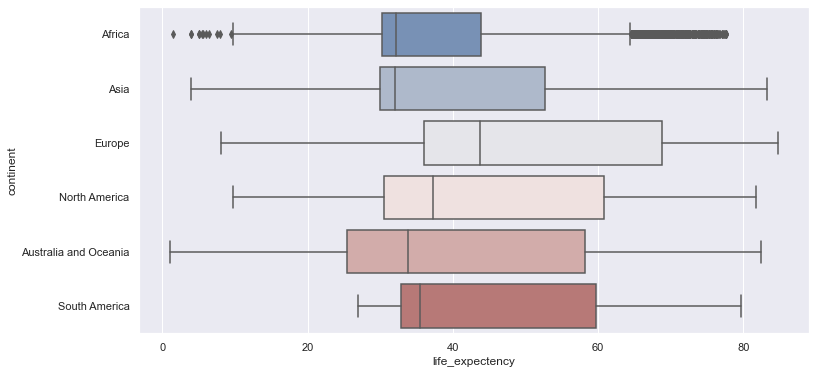

In [20]:
# sns.set(rc={'figure.figsize':(12,9)})
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, y = "continent", x = "life_expectency", palette="vlag")

In [13]:
merged_df

,continent,country,year,life_expectency
161,Africa,Algeria,1961.0,48.02
162,Africa,Algeria,1962.0,48.55
163,Africa,Algeria,1963.0,49.07
164,Africa,Algeria,1964.0,49.58
165,Africa,Algeria,1965.0,50.09
...,...,...,...,...
38205,South America,Venezuela,2012.0,74.60
38206,South America,Venezuela,2013.0,74.70
38207,South America,Venezuela,2014.0,74.80
38208,South America,Venezuela,2015.0,74.80


<AxesSubplot:xlabel='year', ylabel='life_expectency'>

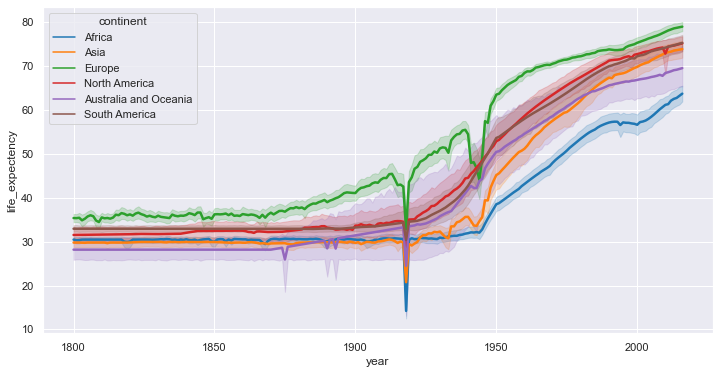

In [23]:
sns.set(rc={'figure.figsize':(12,6)})
sns.lineplot(x = "year", y = "life_expectency", data = merged_df, hue = "continent", palette="tab10", linewidth=2.5)

In [24]:
merged_df.groupby(["continent", "year"]).mean().reset_index()

,continent,year,life_expectency
0,Africa,1800.0,30.472200
1,Africa,1801.0,30.336400
2,Africa,1802.0,30.336600
3,Africa,1803.0,30.472800
4,Africa,1804.0,30.473000
...,...,...,...
1297,South America,2012.0,74.608333
1298,South America,2013.0,74.775000
1299,South America,2014.0,74.958333
1300,South America,2015.0,75.141667


## Dynamic plot

In [32]:
!pip install plotly
!pip install "notebook>=5.3" "ipywidgets>=7.5"
!conda install -c plotly plotly
import plotly.express as px

Solving environment: done

## Package Plan ##

  environment location: /Users/maxim/opt/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.3.1               |             py_0         6.8 MB  plotly
    tenacity-8.0.1             |   py38hecd8cb5_0          38 KB
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-5.3.1-py_0
  tenacity           pkgs/main/osx-64::tenacity-8.0.1-py38hecd8cb5_0


Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



In [31]:
pd.options.plotting.backend = "plotly"

fig = px.line(
      merged_df.groupby(["continent", "year"]).mean().reset_index()
    , x = "year"
    , y = "life_expectency"
    , color = "continent"
)
fig.show()

fig.write_html("./output/life-expectency.html")

In [ ]:
merged_df

## Recap

In [ ]:
# 1. Read a data file
df = pd.read_csv('./data/gapminder_total_fertility.csv', index_col=0)

In [ ]:
# 2. Inspect the size of a DataFrame
df.shape

In [ ]:
df.columns

In [ ]:
# 3. Convert column labels to integers
# df.columns = df.columns.astype(int)
# df.set_axis(df.columns.astype(int), axis=0, inplace=True)
df.set_axis(df.columns.astype(int), axis=1, inplace=True)
df.columns

In [ ]:
# 4. Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
df

In [ ]:
# 5. Inspect a single value
df.loc['Germany', 2000]

In [ ]:
# 6. Calculate the mean of a column
df[2000].mean()

In [ ]:
# 7. Filter rows with values in given range
df[df[2000].between(6.0, 6.5)][2000]

In [ ]:
df

In [ ]:
# 8. Mean fertility over time
# melted = df.melt(var_name="year", value_name="fertility")
# d = melted.groupby("year").mean().reset_index()
# d
# sns.lineplot(data=d, x="year", y="fertility")

df.mean().plot()

In [ ]:
df.loc[['Germany', 'Sweden', 'Kenya']].transpose()

In [ ]:
# 9. Three countries over time
df.loc[['Germany', 'Sweden', 'Kenya']].transpose().plot()

In [ ]:
# 10. Countries with most frequent initials
df.reset_index()['Total fertility rate'].str[0].value_counts().head().plot.bar()
# df.reset_index()['Total fertility rate'].str[0].value_counts().head(5).plot.bar()
# df.reset_index()['Total fertility rate'].str[0].value_counts.head.plot.bar